In [1]:
# Author: Morpheus Hsieh
# Ref: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

from __future__ import print_function, division  

import os, sys
import copy
import matplotlib.pyplot as plt
import numpy as np
import time

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, models, transforms

plt.ion()   # interactive mode

In [2]:
ProcessedPath = r'D:\GitWork\ants_and_bees\processed'

normalize = transforms.Normalize(
    mean = [0.485, 0.456, 0.406],
    std  = [0.229, 0.224, 0.225]
)

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ]),
}

image_datasets = {
    x: datasets.ImageFolder(os.path.join(ProcessedPath, x), data_transforms[x])
    for x in ['train', 'valid']
}

trainSet = image_datasets['train']
validSet = image_datasets['valid']

class_names = trainSet.classes
print('classes: ', class_names)

class_indexes = trainSet.class_to_idx
print('class to index: ', class_indexes)

print()
print('size: ', len(trainSet))

trainX, trainY = trainSet[0]
print('\nimage:')
print(trainX)
print('label:', trainY)

classes:  ['ants', 'bees']
class to index:  {'ants': 0, 'bees': 1}

size:  244

image:
tensor([[[-0.6623, -0.6794, -0.6794,  ..., -0.7479, -0.7137, -0.7308],
         [-0.6623, -0.6623, -0.6623,  ..., -0.7308, -0.7137, -0.7137],
         [-0.6794, -0.6794, -0.6794,  ..., -0.6965, -0.7137, -0.7137],
         ...,
         [-0.5424, -0.5424, -0.5424,  ..., -0.6109, -0.6109, -0.6109],
         [-0.5253, -0.5253, -0.5253,  ..., -0.6109, -0.5938, -0.5938],
         [-0.5253, -0.5253, -0.5253,  ..., -0.6281, -0.6109, -0.5938]],

        [[ 0.6429,  0.6254,  0.6254,  ...,  0.5553,  0.5903,  0.5728],
         [ 0.6429,  0.6429,  0.6429,  ...,  0.5728,  0.5903,  0.5903],
         [ 0.6254,  0.6254,  0.6254,  ...,  0.6078,  0.5903,  0.5903],
         ...,
         [ 0.8529,  0.8529,  0.8529,  ...,  0.7829,  0.7829,  0.7654],
         [ 0.8529,  0.8529,  0.8529,  ...,  0.7479,  0.7654,  0.7654],
         [ 0.8529,  0.8529,  0.8529,  ...,  0.7304,  0.7479,  0.7654]],

        [[ 2.3088,  2.2914,  

In [3]:
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    ) for x in ['train', 'valid']
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
print(dataset_sizes)

show_size = 10
for i, data in enumerate(image_datasets['train']):
    if i >= show_size: break
    print('\ni:',i)
    image, label = data
    print('image:', image)
    print('label:', label)


{'train': 244, 'valid': 153}

i: 0
image: tensor([[[-0.8678, -0.8849, -0.8678,  ..., -0.5938, -0.6109, -0.6109],
         [-0.8678, -0.8678, -0.8507,  ..., -0.6109, -0.6109, -0.6109],
         [-0.8849, -0.8678, -0.8507,  ..., -0.6109, -0.6109, -0.6109],
         ...,
         [-0.6281, -0.6281, -0.6109,  ..., -0.6794, -0.6794, -0.6794],
         [-0.6281, -0.6281, -0.6109,  ..., -0.6794, -0.6794, -0.6965],
         [-0.6109, -0.6109, -0.6109,  ..., -0.6794, -0.6794, -0.6794]],

        [[ 0.4678,  0.4503,  0.4678,  ...,  0.7304,  0.7129,  0.7129],
         [ 0.4678,  0.4678,  0.4853,  ...,  0.7129,  0.7129,  0.7129],
         [ 0.4503,  0.4678,  0.4853,  ...,  0.7129,  0.7129,  0.7129],
         ...,
         [ 0.7479,  0.7654,  0.7829,  ...,  0.6779,  0.6779,  0.6779],
         [ 0.7654,  0.7654,  0.7829,  ...,  0.6779,  0.6779,  0.6604],
         [ 0.7829,  0.7829,  0.7829,  ...,  0.6779,  0.6779,  0.6779]],

        [[ 2.1694,  2.1520,  2.1694,  ...,  2.3088,  2.2914,  2.2914],
   

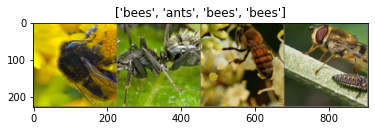

In [4]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp  = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    inp  = std * inp + mean
    inp  = np.clip(inp, 0, 1)
    plt.imshow(inp)
    
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [5]:
print(inputs.shape)
# print(inputs)
print(classes)

torch.Size([4, 3, 224, 224])
tensor([1, 0, 1, 1])


In [6]:
use_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if use_gpu else "cpu")
print(device)

cuda:0


In [7]:
# Training the model

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [8]:
# Finetuning the convnet

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [9]:
# Train and evaluate

model_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25
)

Epoch 0/24
----------
train Loss: 0.6445 Acc: 0.6557
valid Loss: 0.3033 Acc: 0.8824

Epoch 1/24
----------
train Loss: 0.4623 Acc: 0.8033
valid Loss: 0.2492 Acc: 0.8889

Epoch 2/24
----------
train Loss: 0.3907 Acc: 0.8320
valid Loss: 0.2421 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.5994 Acc: 0.7377
valid Loss: 0.5804 Acc: 0.7843

Epoch 4/24
----------
train Loss: 0.4557 Acc: 0.7910
valid Loss: 0.3237 Acc: 0.8562

Epoch 5/24
----------
train Loss: 0.4791 Acc: 0.8074
valid Loss: 0.2333 Acc: 0.9216

Epoch 6/24
----------
train Loss: 0.4581 Acc: 0.8115
valid Loss: 0.2201 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.4774 Acc: 0.8279
valid Loss: 0.2248 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.4657 Acc: 0.8074
valid Loss: 0.2014 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3025 Acc: 0.8852
valid Loss: 0.2524 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.3214 Acc: 0.8484
valid Loss: 0.2022 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3435 Acc: 0.8566
valid Loss

In [10]:
# Visualizing the model predictions

def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

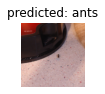

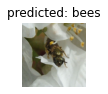

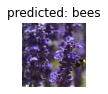

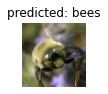

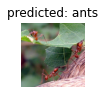

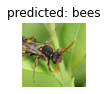

In [11]:
visualize_model(model_ft)